In [1]:
import cv2
import numpy as np
import radishlib as rdl
# %matplotlib nbagg
# matplotlib.use('nbagg') 
%matplotlib inline
# %matplotlib notebook
# 表示のオンオフ
import matplotlib.pyplot as plt
IMGON = True

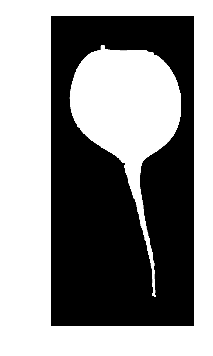

In [49]:
img = cv2.imread('pics/ds1.jpg',0)
rdl.plotimg(img)

In [50]:
# 白連結成分のラベリング 
output = cv2.connectedComponentsWithStats(img, connectivity = 4)  # 白領域の場合は４連結処理であることに注意
# Get the results
num_labels = output[0]  # 連結成分の数 
labels = output[1] # ラベル画像
stats = output[2] # 属性情報の配列　cv2.CC_STAT_AREA番が面積me
menseki = stats[:,cv2.CC_STAT_AREA]
centroids = output[3]
print(num_labels,labels.shape,menseki,centroids.shape)

1740 (1334, 609) [610172      1      2 ...,      1      2      1] (1740, 2)


[   3   68 1109 ..., 1068 1069    0] [610172      1      2 ...,      1      2      1] 3


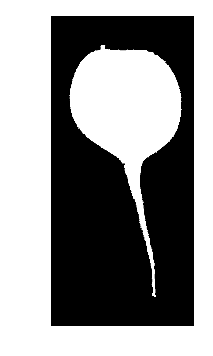

In [51]:
# 1番大きな領域がダイコンの主要部分であると仮定する。
sortedindex = menseki[1:].argsort()[::-1]  # ０番以外をソーティングしたときの値の多い順に index を並べたもの
dnum = sortedindex[0] # 1番多いデータのインデックス。
print(sortedindex,menseki,dnum)

daikonimg = np.uint8(labels==dnum+1)*255
rdl.plotimg(daikonimg)

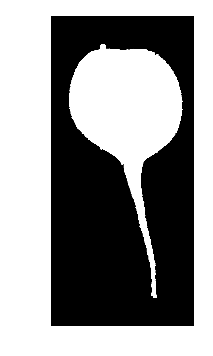

In [52]:
bw,pts = rdl.getContour(daikonimg,0)
# 確認のための描画
xdata = [i[0][0]  for i in ｐｔｓ[0]]
ydata = [i[0][1]  for i in pts[0]]   

# 輪郭データの重複を取り除く
pts =  []
for i in range(len(xdata)):
    if [xdata[i],ydata[i]] not in pts:
        pts.append([xdata[i],ydata[i]] )
cpts = np.array(pts)

# plt.gca().set_aspect('equal',adjustable='box')
# plt.plot(cｐｔs[:,0],cpts[:,1],"r")
rdl.plotimg(rdl.drawRadishContour(daikonimg, cpts, 3,0,10))

＃　参考 
- [点列から曲率、曲率半径を求める（FastCode）](http://sach1o.blog80.fc2.com/blog-entry-96.html)
- http://d.hatena.ne.jp/ryamada/20141109/1415495218

![](http://blog-imgs-27.fc2.com/s/a/c/sach1o/discrete_curvature.gif)

曲率計算のためのサンプル間距離は 15
ミディアンフィルタのサイズ 20
曲率最大の点は 1471 番のサンプル点で、曲率は 0.106185655589 座標は [ 438 1207]


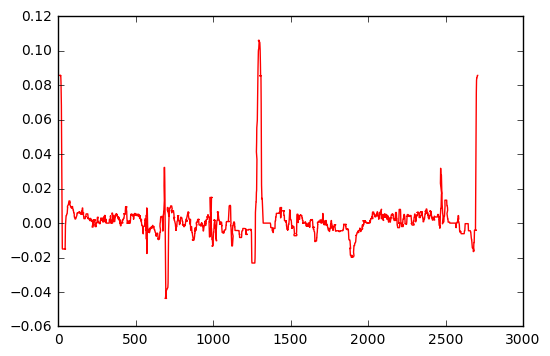

In [54]:
v, l, cvs,tip= rdl.curvature(cpts,samplefactor =200,masklen=20)
plt.plot(l,cvs,"r")

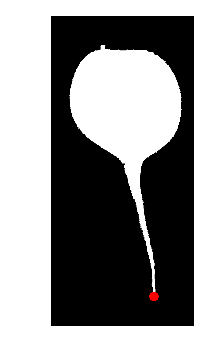

In [55]:
# rdl.plotimg(rdl.drawRadishContour(daikonimg, v, 5,5,10))
pimg = cv2.merge((daikonimg,daikonimg,daikonimg))
plt.show()
rdl.plotimg(cv2.circle(pimg,tuple(tip),20,(0,0,255),-1))

In [56]:
# 曲率最大の点の index を知りたいなら
krmaxindex  = np.argmax(cvs)
print("曲率最大の点は",krmaxindex,"番のサンプル点で、曲率は",  cvs[krmaxindex],"座標は", v[krmaxindex])

曲率最大の点は 1471 番のサンプル点で、曲率は 0.106185655589 座標は [ 438 1207]


曲率計算のためのサンプル間距離は 60
ミディアンフィルタのサイズ 20
曲率最大の点は 1459 番のサンプル点で、曲率は 0.0361234696433 座標は [ 430 1202]


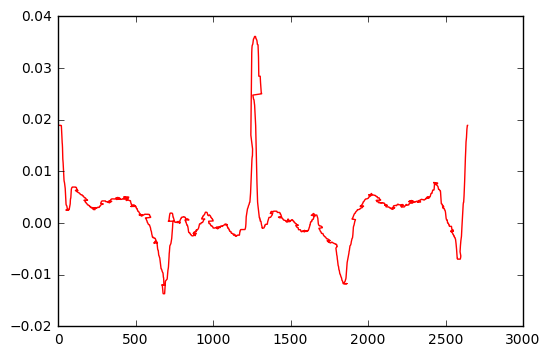

In [57]:
# サンプル間距離を大きくしすぎた場合
v, l, cvs,tip = rdl.curvature(cpts,samplefactor=50)
plt.plot(l,cvs,"r")

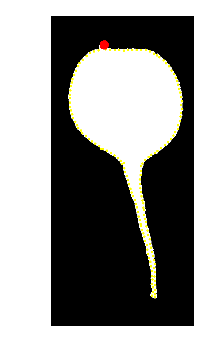

In [61]:
rdl.plotimg(rdl.drawRadishContour(daikonimg, v, 5,5,20,flag=True))

曲率計算のためのサンプル間距離は 15
ミディアンフィルタのサイズ 20
曲率最大の点は 1471 番のサンプル点で、曲率は 0.106185655589 座標は [ 438 1207]


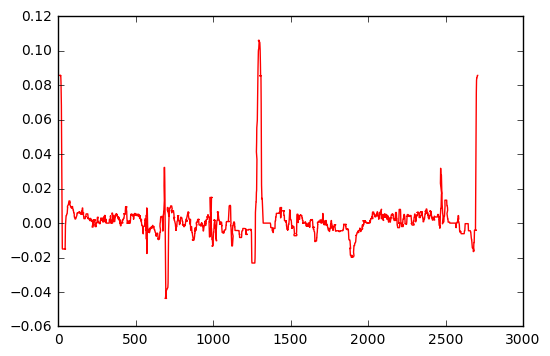

In [39]:
v, l, cvs,tip = rdl.curvature(cpts,samplefactor=200,masklen=20)
plt.plot(l,cvs,"r")

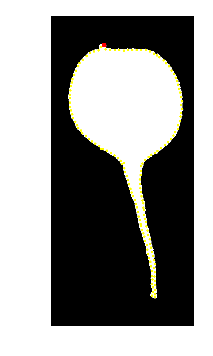

In [40]:
rdl.plotimg(rdl.drawRadishContour(daikonimg, v, 5,5,10,flag=True))

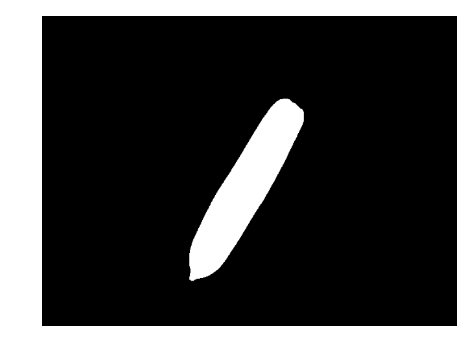

In [62]:
img2 = cv2.imread('pics/bindaikon.png',0)
rdl.plotimg(img2)

In [63]:
# 白連結成分のラベリング 
output2 = cv2.connectedComponentsWithStats(img2, connectivity = 4)  # 白領域の場合は４連結処理であることに注意
# Get the results
num_labels = output[0]  # 連結成分の数
labels = output2[1] # ラベル画像
stats = output2[2] # 属性情報の配列　cv2.CC_STAT_AREA番が面積me
menseki = stats[:,cv2.CC_STAT_AREA]
centroids = output2[3]
print(num_labels,labels.shape,menseki,centroids.shape)

1740 (480, 640) [288474  18726] (2, 2)


[0] [288474  18726] 0


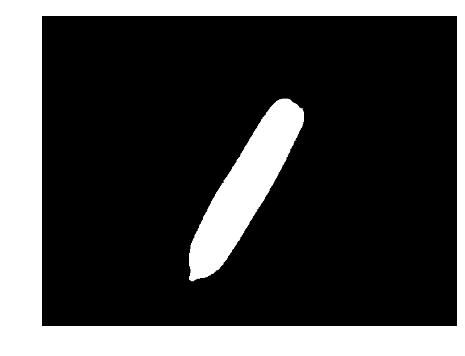

In [64]:
# 1番大きな領域がダイコンの主要部分であると仮定する。
sortedindex = menseki[1:].argsort()[::-1]  # ０番以外をソーティングしたときの値の多い順に index を並べたもの
dnum = sortedindex[0] # 1番多いデータのインデックス。
print(sortedindex,menseki,dnum)

daikonimg = np.uint8(labels==dnum+1)*255
rdl.plotimg(daikonimg)

In [65]:
bw,pts = rdl.getContour(daikonimg,0)
# 確認のための描画
xdata = [i[0][0]  for i in ｐｔｓ[0]]
ydata = [i[0][1]  for i in pts[0]]   # matplot は上が Yの＋方向なので変換

# 輪郭データの重複を取り除く
pts =  []
for i in range(len(xdata)):
    if [xdata[i],ydata[i]] not in pts:
        pts.append([xdata[i],ydata[i]] )
cpts = np.array(pts)

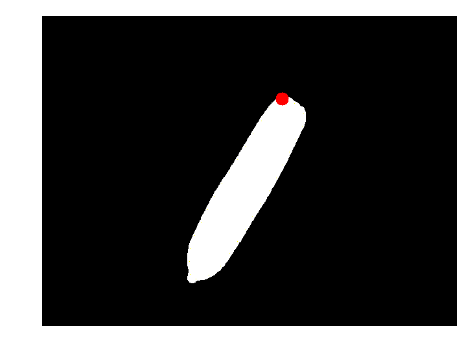

In [67]:
rdl.plotimg(rdl.drawRadishContour(daikonimg, cpts, 3,0,10,flag=True))

曲率計算のためのサンプル間距離は 12
ミディアンフィルタのサイズ 20
曲率最大の点は 598 番のサンプル点で、曲率は 0.0423684147544 座標は [391 137]


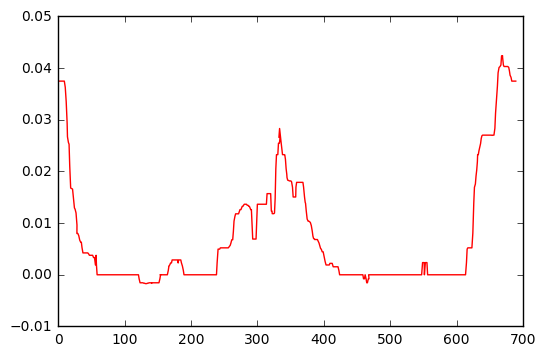

In [68]:
v, l, cvs,tip = rdl.curvature(cpts,samplefactor=50)
plt.plot(l,cvs,"r")

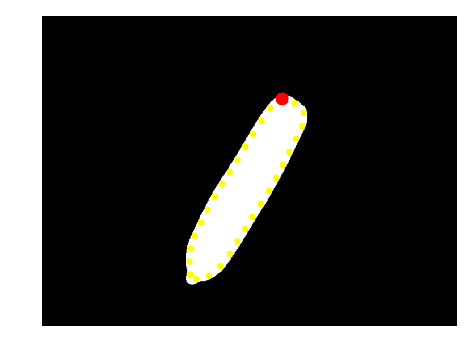

In [70]:
rdl.plotimg(rdl.drawRadishContour(daikonimg, v, 5,5,10,flag=True))